In [ ]:
!pip install soynlp # Levenshtein 편집거리 라이브러리

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 416 kB 15.2 MB/s 


In [ ]:
import pandas as pd
import numpy as np
from soynlp.hangle import levenshtein # 음절 단위 편집거리
from soynlp.hangle import jamo_levenshtein # 초성중성음성을 고려한 편집거리

#### 파일 불러오기

In [ ]:
#### 구글 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Predicted  및 Answer 각각 2개의 파일인 경우  
(하나의 통합 파일일 경우 생략)

In [ ]:
answer_file_path =  '/content/drive/MyDrive/구름 자연어처리과정/프로젝트/Reading Comprehension/사전 평가용/devset_정답.csv'## answer 경로
predicted_file_path = '/content/drive/MyDrive/구름 자연어처리과정/프로젝트/Reading Comprehension/사전 평가용/baseline1.csv' ## predicted 경로

In [ ]:
df_answer = pd.read_csv(answer_file_path)
df_predicted = pd.read_csv(predicted_file_path)

In [ ]:
df_predicted['answer'] = df_answer['answer'] ### 데이터 프레임에 맞게 수정 
eval_df = df_predicted
eval_df

####  Predicted , Answer 통합파일인 경우




In [ ]:
file_path = '/content/drive/MyDrive/Reading Comprehension/src/pytorch_ver1/submit_ver1.csv'  ### 파일 경로


df_integrated = pd.read_csv(file_path)



In [ ]:
df_integrated.columns

Index(['Id', 'Context', 'Question', 'Predicted', 'Anaswer'], dtype='object')

In [ ]:
#####컬럼명 변경 df.rename(columns={'Before':'After'})
eval_df = df_integrated.rename(columns = {'Predicted' : 'Predicted' , 'Anaswer' : 'answer'}) ### 각자 컬럼 명을 함수에 일치하게 바꿔주시면 됩니다
eval_df

,Id,Context,Question,Predicted,answer
0,464098,익산시 서부권역 다목적 체육관이 내달 개관을 앞두고 막바지 개관 준비가 한창이다. ...,익산시에서 시민들의 건강을 위해 운영을 준비 중인 시설은 뭐야,익산시 서부권역 다목적 체육관이 내달 개관을 앞두고 막바지 개관 준비가 한창이다. ...,서부권역 다목적 체육관
1,464098,익산시 서부권역 다목적 체육관이 내달 개관을 앞두고 막바지 개관 준비가 한창이다. ...,거주민들의 건강을 위하여 익산지역은 어떤 걸 만들고 있어,NaN,서부권역 다목적 체육관
2,464131,무주군건강가정ㆍ다문화가족지원센터(센터장 장진원)가 아버지와 자녀를 대상으로 ‘아빠하...,무주군에서 진행되는 부자 부녀 대상 행사 횟수는 전부 몇 번이나 돼,5회에,총 5회
3,464131,무주군건강가정ㆍ다문화가족지원센터(센터장 장진원)가 아버지와 자녀를 대상으로 ‘아빠하...,전체 몇 번의 부자 부녀 대상 활동을 무주군이 실시해,NaN,총 5회
4,464132,양희은의 노래 <엄마가 딸에게>는 엄마와 딸이 차마 말하지 못하는 속마음을 서로에게...,가수 양희은의 콜라보 프로젝트 중 여덟 번째 곡 나무는 어떤 후배와 불렀지,악동뮤지션과,악동뮤지션
...,...,...,...,...,...
115,464193,"문화체육관광부(장관 황희, 이하 문체부)와 한국출판문화산업진흥원(원장 김수영, 이하...",온라인으로 실시되는 도서 출판 관련 표준계약서에 대한 논의는 며칠에 해,NaN,30일
116,464194,전주신흥고(교장 임희종)는 지난 24일 장학생으로 선발된 3학년 김효섭 학생 등 3...,신흥고 총동문회가 학생들을 위해 보조해 주는 돈은 얼마야,NaN,8000만원 가량
117,464194,전주신흥고(교장 임희종)는 지난 24일 장학생으로 선발된 3학년 김효섭 학생 등 3...,신흥고 재학생들에게 지원하는 총동문회의 장학금은 얼마야,NaN,8000만원 가량
118,464195,전북경찰과 도내 금융기관이 보이스피싱(전화금융사기) 피해 예방을 위해 협조체계를 구...,전북경철청이 보이스피싱 피해예방을 잘하는 금융기관에 주는 것은 뭐야,‘ 전화금융사기 예방 우수 지점 ’ 인증패를,‘전화금융사기 예방 우수 지점’ 인증패


## 예시 (Columns 이름이 일치해야 합니다.)
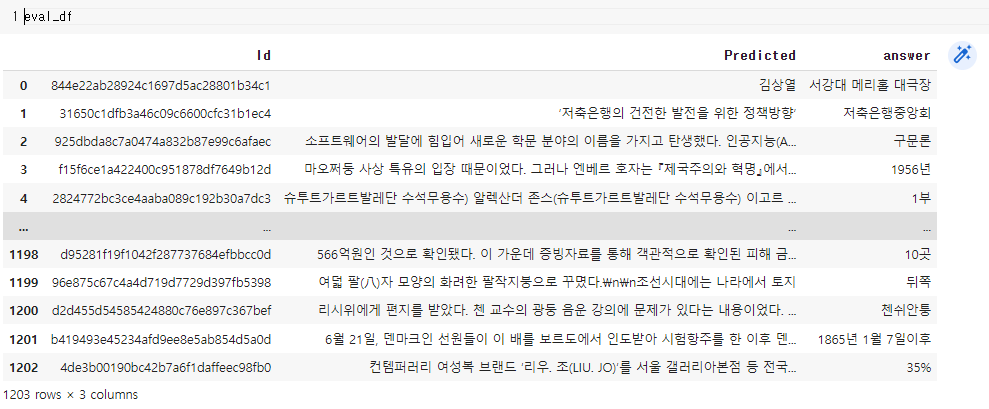

## Levenshtein 함수

In [ ]:
## BLANK 포함 편집거리 계산
def cal_levenshtein(df):
    leven_distance = 0
    
    for i in range(len(df)):
        leven_distance = leven_distance + levenshtein(str(df.loc[i,'answer']),str(df.loc[i,'Predicted']))
    
    return leven_distance/len(df)

In [ ]:
## BLANK "제외" 편집거리 계산
def noblank_cal_levenshtein (df):
    leven_distance = 0
    
    for i in range(len(df)):
        leven_distance = leven_distance + levenshtein(str(df.loc[i,'answer']),str(df.loc[i,'Predicted']))
    
    return leven_distance/len(df)

In [ ]:
# 초중성 단위 levenshtein 거리 계산
def cal_jamo_levenshtein (df):
    '''
    leven_distance = 0
    
    for i in range(len(df)):
        leven_distance = leven_distance + jamo_levenshtein(str(df.loc[i,'answer']),str(df.loc[i,'Predicted']))
    
    return leven_distance/len(df)
    '''

In [ ]:
model_leven_distance = cal_levenshtein(eval_df)
print(model_leven_distance)

47.34166666666667


## 평가 결과 저장

In [ ]:
evaluation_Data = pd.read_csv('/content/drive/MyDrive/Reading Comprehension/pre-evaluation/Pre_evaluation_result/evaluation_Data.csv')

In [ ]:
model_description = str(input(''))   #### 모델 설명을 써주시면 됩니다. 


pytorch_ver1


In [ ]:
tmp_df = evaluation_Data.append({'모델 설명': model_description , 'Leven Distance' : model_leven_distance}, ignore_index = True,)
tmp_df  ## 잘 들어갔는지 확인 해주신 후에

,모델 설명,Leven Distance
0,"베이스라인 기초 모델, Epoch 1",164.089498
1,pytorch_ver1,47.341667


In [ ]:
evaluation_Data = tmp_df
evaluation_Data  ## 다시 한번 확인 해주시고 저장해주시면 됩니다. 

,모델 설명,Leven Distance
0,"베이스라인 기초 모델, Epoch 1",164.089498
1,pytorch_ver1,47.341667


In [ ]:
evaluation_Data.to_csv('/content/drive/MyDrive/Reading Comprehension/pre-evaluation/Pre_evaluation_result/evaluation_Data.csv',index = False)